In [30]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
%matplotlib inline

#### Dataset info

In [3]:
# source: http://yann.lecun.com/exdb/mnist/
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
NUM_CHANNELS = 1
PIXEL_DEPTH = 255
NUM_LABELS = 10
TRAIN_IMAGES_NUM = 60000
TEST_IMAGES_NUM = 10000

#### Loading files

In [4]:
(trainX_raw, trainY_raw), (testX_raw, testY_raw) = mnist.load_data()

#### Present extracted data

In [5]:
def show_digit(trainX_raw, trainY_raw, index):
    image = trainX_raw[index].reshape([IMAGE_WIDTH, IMAGE_HEIGHT])
    label = trainY_raw[index]
    plt.title("Training data, index: {},  Label: {}".format(index, label))
    plt.imshow(image, cmap="gray_r")
    plt.show()

trainX_raw shape: (60000, 28, 28)
trainY_raw shape: (60000,)
testX_raw shape: (10000, 28, 28)
testY_raw shape: (10000,)


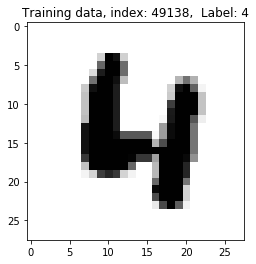

In [6]:
print("trainX_raw shape: " + str(trainX_raw.shape))
print("trainY_raw shape: " + str(trainY_raw.shape))
print("testX_raw shape: " + str(testX_raw.shape))
print("testY_raw shape: " + str(testY_raw.shape))
show_digit(trainX_raw, trainY_raw, np.random.randint(1, TRAIN_IMAGES_NUM + 1))

#### Preprocess data

In [7]:
def normalize(x, pixel_depth):
    return x / pixel_depth

In [8]:
def one_hot_encode(x, num_classes):
    return np_utils.to_categorical(x, num_classes)

In [9]:
trainX_processed = normalize(np.reshape(trainX_raw, (TRAIN_IMAGES_NUM, IMAGE_WIDTH * IMAGE_HEIGHT)), PIXEL_DEPTH)
testX_processed = normalize(np.reshape(testX_raw, (TEST_IMAGES_NUM, IMAGE_WIDTH * IMAGE_HEIGHT)), PIXEL_DEPTH)

In [10]:
print("trainX_raw shape: " + str(trainX_raw.shape) + ", min: " + str(np.min(trainX_raw)) + ", max: " + str(np.max(trainX_raw)))
print("testX_raw shape: " + str(testX_raw.shape) + ", min: " + str(np.min(testX_raw)) + ", max: " + str(np.max(testX_raw)))
print("trainX_processed shape: " + str(trainX_processed.shape) + ", min: " + str(np.min(trainX_processed)) + ", max: " + str(np.max(trainX_processed)))
print("testX_processed shape: " + str(testX_processed.shape) + ", min: " + str(np.min(testX_processed)) + ", max: " + str(np.max(testX_processed)))

trainX_raw shape: (60000, 28, 28), min: 0, max: 255
testX_raw shape: (10000, 28, 28), min: 0, max: 255
trainX_processed shape: (60000, 784), min: 0.0, max: 1.0
testX_processed shape: (10000, 784), min: 0.0, max: 1.0


In [11]:
trainY_processed = one_hot_encode(trainY_raw, NUM_LABELS)
testY_processed = one_hot_encode(testY_raw, NUM_LABELS)

In [12]:
random_train_index = np.random.randint(1, TRAIN_IMAGES_NUM + 1)
random_test_index = np.random.randint(1, TEST_IMAGES_NUM + 1)

print("Label on pos: " + str(random_train_index) + " equals " + str(trainY_raw[random_train_index]) + ", OHE tensor: " + str(trainY_processed[random_train_index]))
print("Label on pos: " + str(random_test_index) + " equals " + str(testY_raw[random_test_index]) + ", OHE tensor: " + str(testY_processed[random_test_index]))

Label on pos: 31785 equals 0, OHE tensor: [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Label on pos: 3445 equals 0, OHE tensor: [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


#### Divide data

In [13]:
VALIDATION_DATA_PERCENTAGE = 0.1

In [14]:
val_samples = int(TRAIN_IMAGES_NUM * VALIDATION_DATA_PERCENTAGE)

In [15]:
train_dataX = trainX_processed[val_samples:]
train_dataY = trainY_processed[val_samples:]
val_dataX = trainX_processed[:val_samples]
val_dataY = trainY_processed[:val_samples]

In [16]:
print("train_dataX shape: " + str(train_dataX.shape))
print("train_dataY shape: " + str(train_dataY.shape))
print("val_dataX shape: " + str(val_dataX.shape))
print("val_dataY shape: " + str(val_dataY.shape))

train_dataX shape: (54000, 784)
train_dataY shape: (54000, 10)
val_dataX shape: (6000, 784)
val_dataY shape: (6000, 10)


#### Neural Network preparation

In [17]:
input_nodes = IMAGE_WIDTH * IMAGE_HEIGHT
hidden_layer_1_nodes = 300
hidden_layer_2_nodes = 75
output_layer_nodes = NUM_LABELS

In [18]:
mlp_model = Sequential()

mlp_model.add(Dense(hidden_layer_1_nodes, activation='relu', input_shape=(input_nodes,)))
mlp_model.add(Dense(hidden_layer_2_nodes, activation='relu'))
mlp_model.add(Dense(output_layer_nodes, activation='softmax'))
          
rms = RMSprop()
mlp_model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

In [19]:
mlp_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 75)                22575     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                760       
Total params: 258,835
Trainable params: 258,835
Non-trainable params: 0
_________________________________________________________________


#### Hyperparameters

In [20]:
epochs = 80
batch_size = 128
learning_rate = 0.05

In [21]:
train_history = mlp_model.fit(trainX_processed, trainY_processed,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(val_dataX, val_dataY))

Train on 60000 samples, validate on 6000 samples
Epoch 1/80
60000/60000 [==============================] - 2s - loss: 0.2636 - acc: 0.9220 - val_loss: 0.1073 - val_acc: 0.9695
Epoch 2/80
60000/60000 [==============================] - 2s - loss: 0.1028 - acc: 0.9690 - val_loss: 0.0885 - val_acc: 0.9715
Epoch 3/80
60000/60000 [==============================] - 2s - loss: 0.0680 - acc: 0.9793 - val_loss: 0.0475 - val_acc: 0.9857
Epoch 4/80
60000/60000 [==============================] - 2s - loss: 0.0504 - acc: 0.9846 - val_loss: 0.0288 - val_acc: 0.9918
Epoch 5/80
60000/60000 [==============================] - 2s - loss: 0.0380 - acc: 0.9883 - val_loss: 0.0227 - val_acc: 0.9930
Epoch 6/80
60000/60000 [==============================] - 2s - loss: 0.0292 - acc: 0.9907 - val_loss: 0.0205 - val_acc: 0.9938
Epoch 7/80
60000/60000 [==============================] - 2s - loss: 0.0226 - acc: 0.9932 - val_loss: 0.0142 - val_acc: 0.9958
Epoch 8/80
60000/60000 [==============================] - 2s -

60000/60000 [==============================] - 2s - loss: 0.0010 - acc: 0.9998 - val_loss: 1.8508e-07 - val_acc: 1.0000
Epoch 64/80
60000/60000 [==============================] - 2s - loss: 5.3254e-04 - acc: 0.9999 - val_loss: 5.7149e-07 - val_acc: 1.0000
Epoch 65/80
60000/60000 [==============================] - 2s - loss: 4.1786e-04 - acc: 0.9999 - val_loss: 3.3344e-06 - val_acc: 1.0000
Epoch 66/80
60000/60000 [==============================] - 2s - loss: 8.2630e-04 - acc: 0.9999 - val_loss: 4.2609e-04 - val_acc: 0.9998
Epoch 67/80
60000/60000 [==============================] - 2s - loss: 9.8634e-04 - acc: 0.9999 - val_loss: 6.1455e-07 - val_acc: 1.0000
Epoch 68/80
60000/60000 [==============================] - 2s - loss: 6.5181e-04 - acc: 0.9999 - val_loss: 5.8745e-06 - val_acc: 1.0000
Epoch 69/80
60000/60000 [==============================] - 2s - loss: 9.4466e-04 - acc: 0.9998 - val_loss: 2.3358e-05 - val_acc: 1.0000
Epoch 70/80
60000/60000 [==============================] - 2s - 

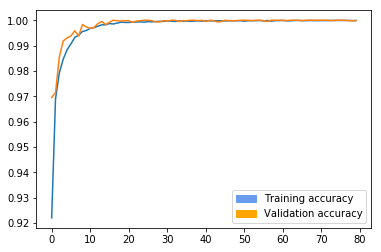

In [32]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(train_history.history['acc'], label='Training acc')
ax1.plot(train_history.history['val_acc'], label='Validation acc')
blue_patch = mpatches.Patch(color='#699cef', label='Training accuracy')
orange_patch = mpatches.Patch(color='orange', label='Validation accuracy')
ax1.legend(handles=[blue_patch, orange_patch])
plt.show()

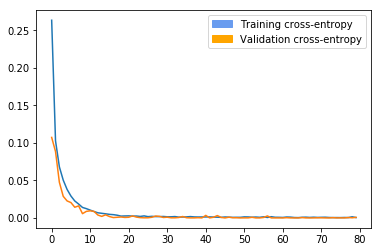

In [33]:
fig1 = plt.figure()
ax2 = fig1.add_subplot(111)
ax2.plot(train_history.history['loss'], label='Training loss')
ax2.plot(train_history.history['val_loss'], label='Validation loss')
blue_patch = mpatches.Patch(color='#699cef', label='Training cross-entropy')
orange_patch = mpatches.Patch(color='orange', label='Validation cross-entropy')
ax2.legend(handles=[blue_patch, orange_patch])
plt.show()

In [22]:
score = mlp_model.evaluate(testX_processed, testY_processed, verbose=0)

In [34]:
print("Accuracy: " + str(score[1]))

Accuracy: 0.9811
